<a href="https://colab.research.google.com/github/khoramian/nlp/blob/main/DF_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/tobran/DF-GAN

Cloning into 'DF-GAN'...
remote: Enumerating objects: 249, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 249 (delta 47), reused 40 (delta 40), pack-reused 184 (from 1)
Receiving objects: 100% (249/249), 3.37 MiB | 18.96 MiB/s, done.
Resolving deltas: 100% (109/109), done.


In [9]:
# !pip install tqdm numpy easydict pandas jupyter pyyaml ipykernel scipy nltk tensorboard ftfy regex torch==2.5.0 torchvision torchaudio

In [2]:
# %cd /content/DF-GAN/data
from google.colab import drive
drive.mount('/content/drive')

!cp "/content/drive/My Drive/nlp/birds.zip" /content/DF-GAN/data
!unzip -o /content/DF-GAN/data/birds.zip -d /content/DF-GAN/data

!cp "/content/drive/My Drive/nlp/CUB_200_2011.tgz" /content/DF-GAN/data
!mkdir /content/DF-GAN/data/birds
!tar -xvzf /content/DF-GAN/data/CUB_200_2011.tgz -C /content/DF-GAN/data/birds

Streaming output truncated to the last 5000 lines.
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0050_111087.jpg
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0079_113288.jpg
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0004_111989.jpg
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0068_113247.jpg
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0127_111935.jpg
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0094_112773.jpg
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0028_113217.jpg
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0126_110959.jpg
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0007_111029.jpg
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0096_111519.jpg
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0120_113001.jpg
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0010_112678.jpg
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0025_111669.jpg
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0084_111300.j

In [3]:
# approximate runtime per epoch:
# to show grids change line 337 and 341 in code/lib/modules.py
  # to fixed_grid = make_grid(fixed_results.cpu(), nrow=8, normalize=True)
!sed -i '337s/range=(-1, 1), //g' /content/DF-GAN/code/lib/modules.py
!sed -i '341s/range=(-1, 1), //g' /content/DF-GAN/code/lib/modules.py
!sed -i '220s/dist.get_world_size()/1/' /content/DF-GAN/code/lib/modules.py
!sed -i '258,260c\                pred_all = pred.squeeze(-1).squeeze(-1)' /content/DF-GAN/code/lib/modules.py

In [12]:
# %cd DF-GAN/code

# !sed -i 's/nf: 32/nf: 16/' /content/DF-GAN/code/cfg/bird.yml
# !sed -i 's/max_epoch: 1301/max_epoch: 4/' /content/DF-GAN/code/cfg/bird.yml

# !sed -i 's/save_interval: 10/save_interval: 3/' /content/DF-GAN/code/cfg/bird.yml

# # check copilot and two files dataset and fp16
# !python src/train.py --cfg "/content/DF-GAN/code/cfg/bird.yml" --gpu_id 0 --local_rank 0 --batch_size 64 --imsize 128

In [13]:
!ls saved_models/bird

ls: cannot access 'saved_models/bird': No such file or directory


In [14]:
#!tensorboard --logdir=./code/logs/bird/train --port 8166 --bind_all

## Validation

In [5]:
!mkdir -p /content/DF-GAN/code/saved_models
!cp "/content/drive/My Drive/nlp/pretrained_bird.zip" /content/DF-GAN/code/saved_models
!unzip -o /content/DF-GAN/code/saved_models/pretrained_bird.zip -d /content/DF-GAN/code/saved_models

Archive:  /content/DF-GAN/code/saved_models/pretrained_bird.zip
   creating: /content/DF-GAN/code/saved_models/bird/
  inflating: /content/DF-GAN/code/saved_models/__MACOSX/._bird  
  inflating: /content/DF-GAN/code/saved_models/bird/.DS_Store  
  inflating: /content/DF-GAN/code/saved_models/__MACOSX/bird/._.DS_Store  
   creating: /content/DF-GAN/code/saved_models/bird/pretrained/
  inflating: /content/DF-GAN/code/saved_models/__MACOSX/bird/._pretrained  
  inflating: /content/DF-GAN/code/saved_models/bird/pretrained/state_epoch_1220.pth  
  inflating: /content/DF-GAN/code/saved_models/__MACOSX/bird/pretrained/._state_epoch_1220.pth  


In [31]:
%cd DF-GAN/code
!sed -i 's/save_image: False/save_image: True/' /content/DF-GAN/code/cfg/bird.yml

!python src/test_FID.py --cfg "/content/DF-GAN/code/cfg/bird.yml" --gpu_id 0 --batch_size 64 --num_workers 1

[Errno 2] No such file or directory: 'DF-GAN/code'
/content/DF-GAN/code
2025-06-29 10:48:16.464043: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751194096.483413    7318 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751194096.489509    7318 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-29 10:48:16.509928: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/content/DF-GAN/code/lib/datasets.py:131: FutureWarni

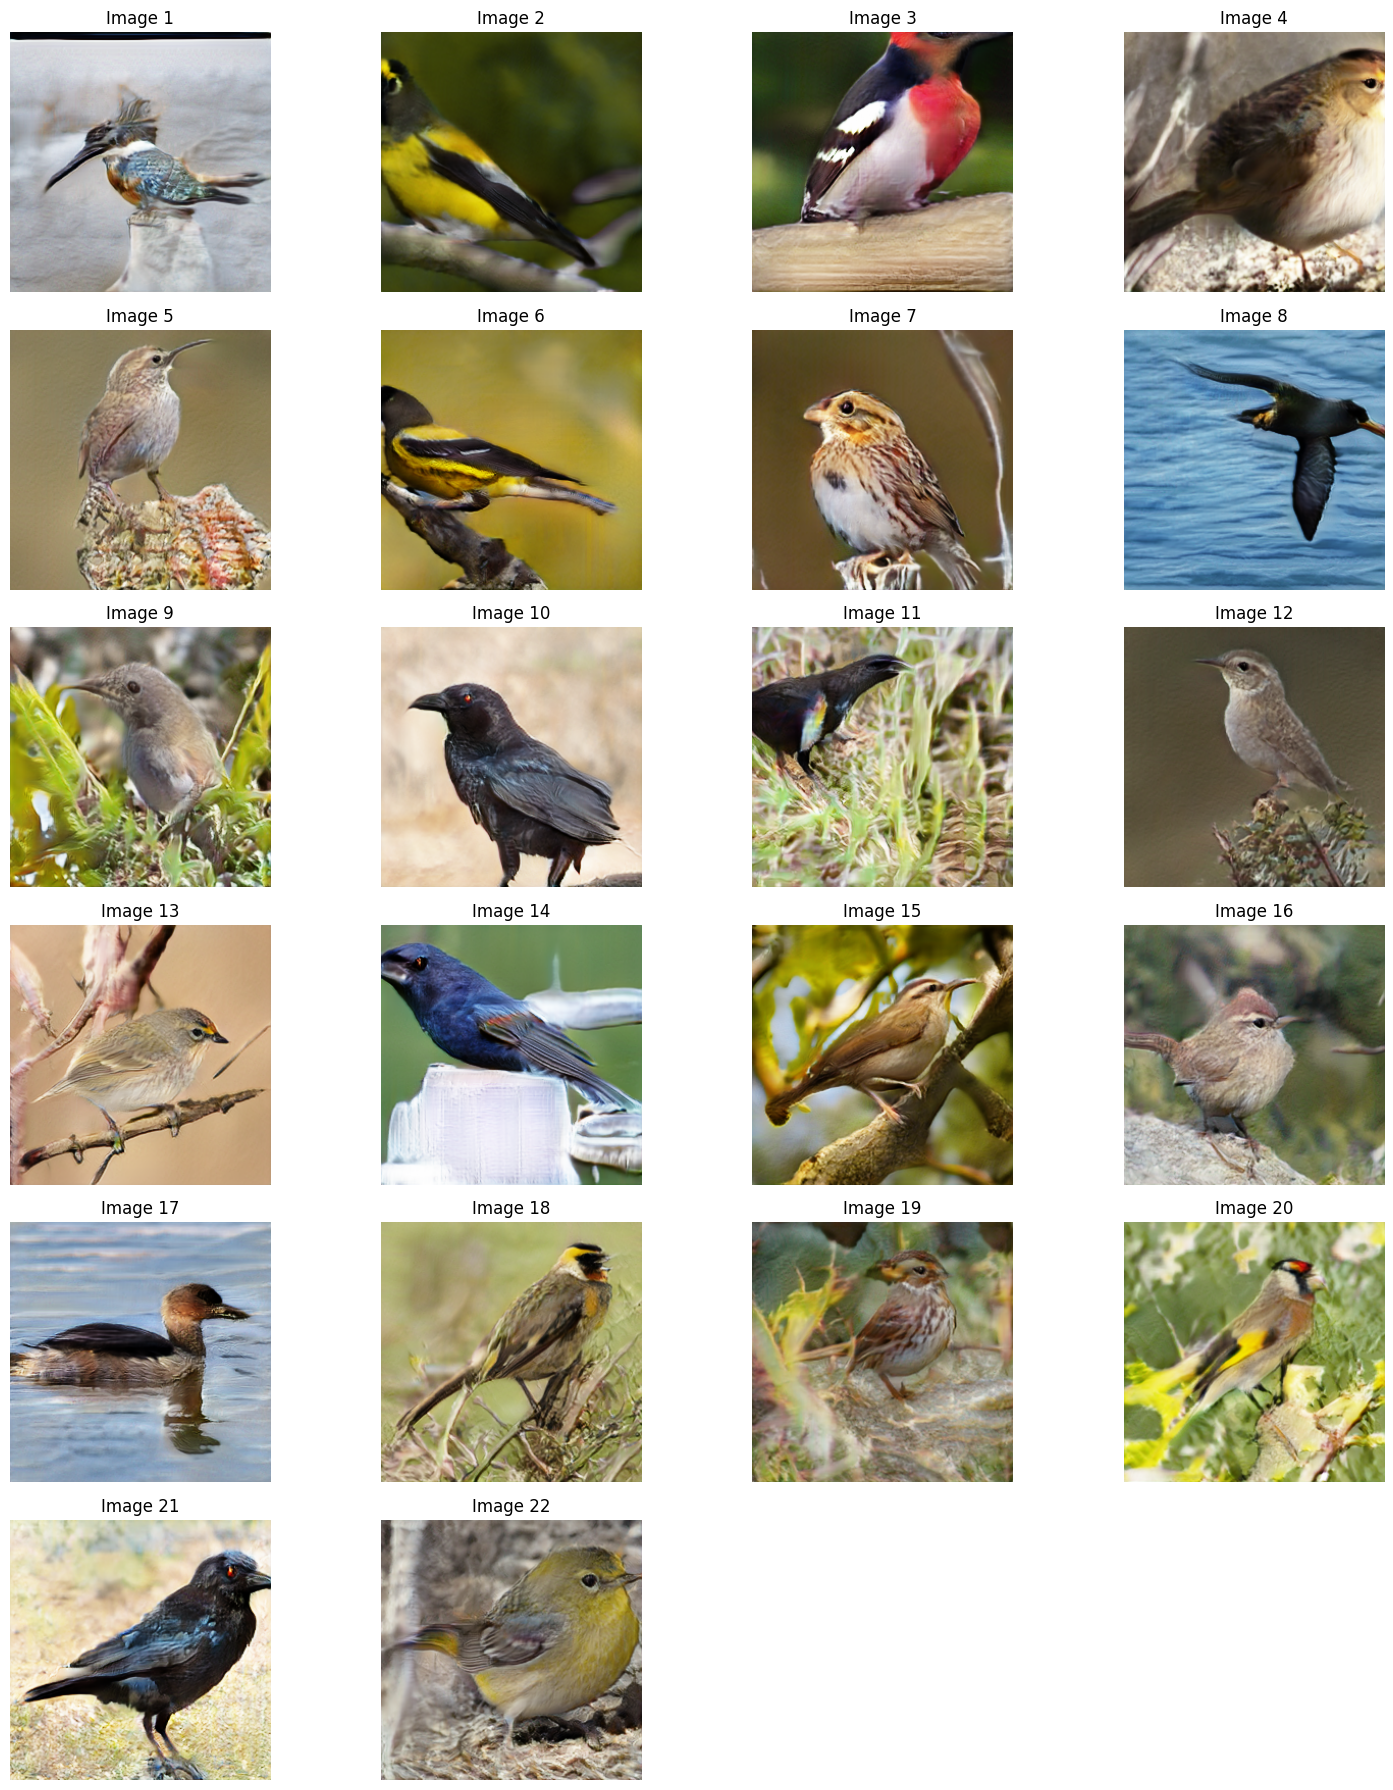

In [33]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Find the latest results folder
base_dir = "./vals/bird"
val_subdirs = [os.path.join(base_dir, d) for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]
latest_dir = max(val_subdirs, key=os.path.getmtime)

# Load and sort image files
image_files = sorted([f for f in os.listdir(latest_dir) if f.endswith(".png")])
num_images = min(16, len(image_files))  # Adjust for how many to show
cols = 4
rows = (num_images + cols - 1) // cols

# Plot in a grid
plt.figure(figsize=(15, rows * 3))
for i in range(num_images):
    img_path = os.path.join(latest_dir, image_files[i])
    img = mpimg.imread(img_path)
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Image {i+1}")
plt.tight_layout()
plt.show()

In [11]:
%cd DF-GAN/code
# !sed -i 's/save_image: False/save_image: True/' /content/DF-GAN/code/cfg/bird.yml
!sed -i '84s/range=(-1, 1), //g' /content/DF-GAN/code/src/sample.py

!python src/sample.py --cfg "/content/DF-GAN/code/cfg/bird.yml" --gpu_id 0 --cuda True

[Errno 2] No such file or directory: 'DF-GAN/code'
/content/DF-GAN/code
Load from:  ../data/birds/captions_DAMSM.pickle
/usr/local/lib/python3.11/dist-packages/torchvision/models/inception.py:43: FutureWarning: The default weight initialization of inception_v3 will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn(
Load ./saved_models/bird/pretrained/state_epoch_1220.pth for NetG
************ Start sampling ************
****************************************
100% 26/26 [00:19<00:00,  1.31it/s]
****************************************
Sampling done, 21.26s cost, saved to ./samples/bird/202

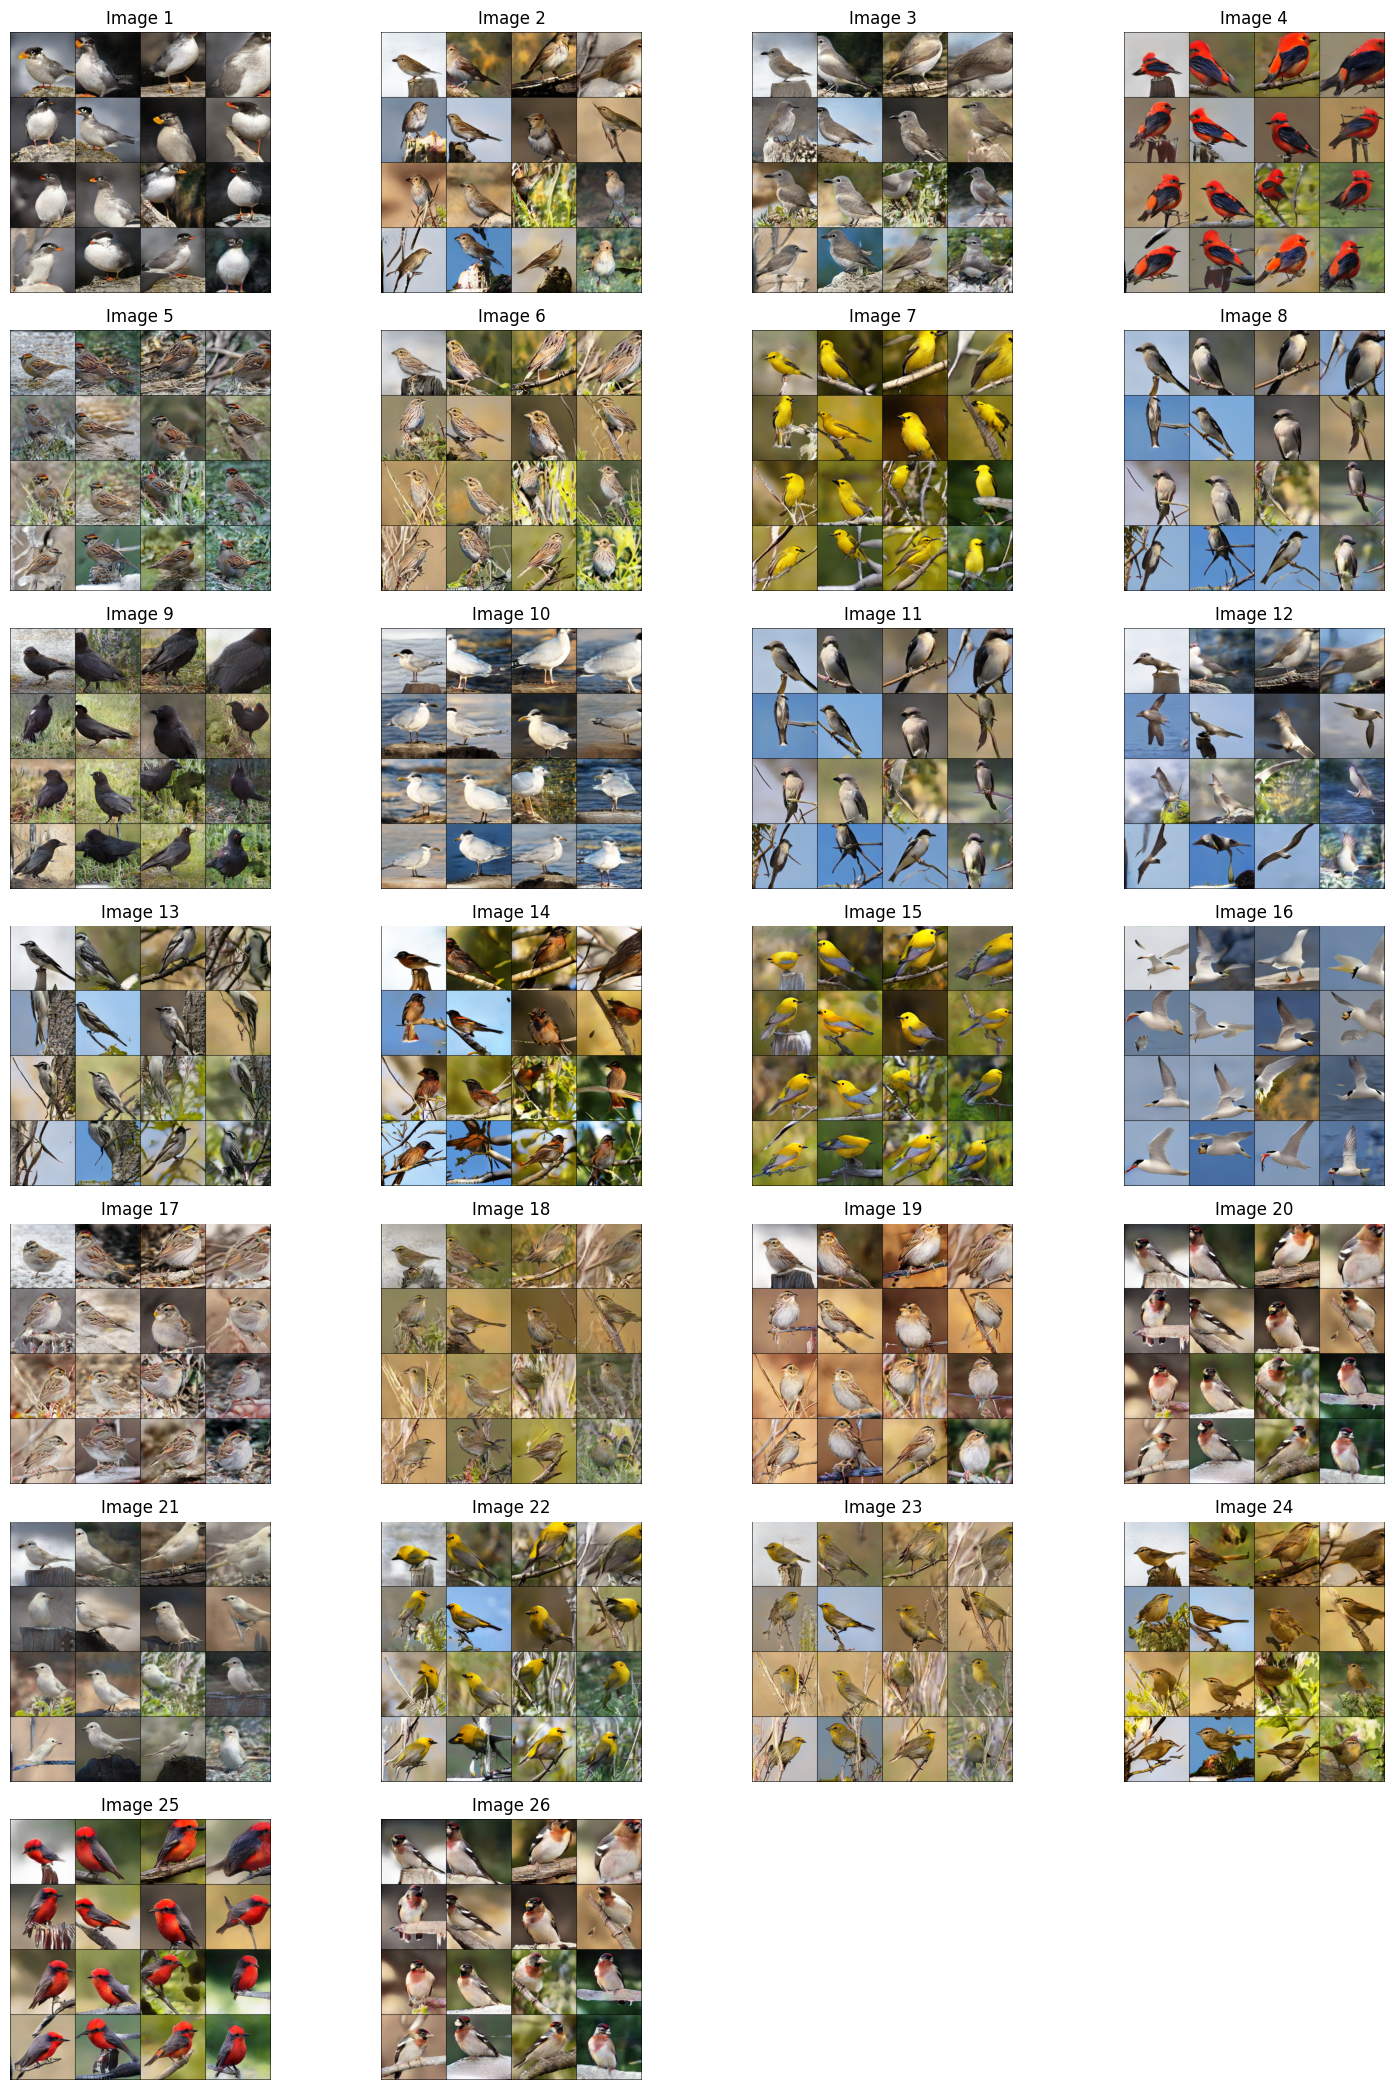

In [12]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Find the latest results folder
base_dir = "./samples/bird"
val_subdirs = [os.path.join(base_dir, d) for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]
latest_dir = max(val_subdirs, key=os.path.getmtime)

# Load and sort image files
image_files = sorted([f for f in os.listdir(latest_dir) if f.endswith(".png")])
num_images = min(26, len(image_files))  # Adjust for how many to show
cols = 4
rows = (num_images + cols - 1) // cols

# Plot in a grid
plt.figure(figsize=(15, rows * 3))
for i in range(num_images):
    img_path = os.path.join(latest_dir, image_files[i])
    img = mpimg.imread(img_path)
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Image {i+1}")
plt.tight_layout()
plt.show()